In [1]:
# Ebnable HTML/CSS 
from IPython.core.display import HTML
HTML("<link href='https://fonts.googleapis.com/css?family=Passion+One' rel='stylesheet' type='text/css'><style>div.attn { font-family: 'Helvetica Neue'; font-size: 30px; line-height: 40px; color: #FFFFFF; text-align: center; margin: 30px 0; border-width: 10px 0; border-style: solid; border-color: #5AAAAA; padding: 30px 0; background-color: #DDDDFF; }hr { border: 0; background-color: #ffffff; border-top: 1px solid black; }hr.major { border-top: 10px solid #5AAA5A; }hr.minor { border: none; background-color: #ffffff; border-top: 5px dotted #CC3333; }div.bubble { width: 65%; padding: 20px; background: #DDDDDD; border-radius: 15px; margin: 0 auto; font-style: italic; color: #f00; }em { color: #AAA; }div.c1{visibility:hidden;margin:0;height:0;}div.note{color:red;}</style>")

## Lab Assignment Seven: Convolutional Network

________________________________________________________________________________________________________
* Name1: Simin Wang
* Name2: Yibo Tang
* Name3: Jingzhen Hu

## Contents
* <a href="#PO">1. Preparation</a>
 * 1.1 Business Understanding
 * 1.2 Data Understanding and Pre-processing
 * 1.3 Metric Selection
 * 1.4 Data Splitting
 
 
* <a href="#Modeling">2. Modeling</a>
 * 2.1 Convolutional Network
 * 2.2 Comparison of Different Convolutional Network
 * 2.3 Comparison of Best Convolutional Network and MLP


* <a href="#ExceptionalWork">3. Exceptional Work</a>
 
 
* <a href="#References">References</a>
<a id="Loading"></a>

<a id="PO"></a>
## 1. Preparation

### 1.1 Business Understanding

####  Overview
Term computer vision is defined as an interdisciplinary field that copes with how computers can be made for gaining in-depth understanding from digital pictures or videos. From the perspective of computer engineering, it seeks to automate tasks that the human visual system can do [1]. A typical research group that Led by F. Li at Stanford University, has been developing intelligent algorithms that conduct important visual perception tasks such as object recognition, scene categorization, integrative scene understanding, human motion recognition, material recognition in real life [2].

Dataset used in this project is originated from the computer vision field and is of use to classify the selected objects (into different categories) based on their properties.

This dataset includes 1,001 colored images ("instances") that correspond to 8 categories like Pascal VOC [3] (Chair, Sofa, Boat, Aeroplane, Car, Motorbike, and scenes (2)). Every digital instances are in the form of JEPG (*.jpg). Six classes are well balanced with approximately 100 samples. The Abnormality Detection in Images guide book [4] has clearly mentioned the primary use of this dataset in object classification.

#### Objectives (why was this data collected in the first place?)

It is said that when it comes to describing images, we tend to concentrate on the most interesting components rather than the obvious. B. Saleh et, al. at Rutgers, The State University of New Jersey argued that abnormalities and deviations from typicalities are among the most significant parts that contribute to what is worth mentioning.

So this dataset was created during their project work via three major resources (Choi, Torralba, and Willsky 2012; Park, Kim, and Lee 2012; Saleh, Farhadi, and Elgammal 2013)) along with the images they selected from the web [4], [5]; they also pruned the collection by removing duplicates and very low-quality images to form a set of 1,001 unique abnormal images. Via this dataset, an abnormality detection algorithm has been introduced in their recognition study and it has shown the best way to model typicalities and, consequently, important variations from prototypical properties of classes. What has been proved is that the models can recognize abnormalities and response to the identified abnormality [6]. Also, the model they have proposed from the AAAI 2016 dataset enables the image categorization in practice.

#### Motivations (why is this data important?)

Once again, we have adapted this dataset for the task of computer vision practice. The applications of artificial vision are being used widely in our life, for example, the detection of persons in museum security system, the use in law enforcement such as matching face of person in criminal database, and use in robotics [7]. Our primary goal is to provide the service of abnormality identification for different companies, even government organizations and institutions, including Homeland Security. For example, our model could help identify terrorists based on the images or vedios, especially when they disguise themselves or change their appearances a little bit. 

Who will be the party to benefit from our model, i.e., in terms of applications, we think this model could be a possible deployment in the enforcement camera, for example, if a vehicle with "abnormal" looking (like heavy-colored engine smoking) passed a vision-equipped device, our system could identify this object as a car firstly, and it will give out signals to avoid the building of hazard. Also, as cited by the dataset creator, state-of-the-art computer vision algorithms fail to achieve similar generalization of abnormality detection, which means under-studied problem will cost a large amount of resources to adjust the 'bias'- so our model (or algorithm) after carefully training will be of assist in their calibration, like the white Eye Detector app (https://itunes.apple.com/us/app/white-eye-detector/id904042354?mt=8) that one of our group members has contributed to, might interest in introducing our model to adjust the app's generalization in identifying retinoblastoma (a rarely found cancer that rapidly develops from the immature cells of a retina) and Coats' disease regardless of the shapes of eye as an example (like some individual might have been gone through eye surgery and the old app cannot identify this 'abnormal' case). 

#### How well would your prediction algorithm need to perform to be considered useful?

The human visual system can usually spot an abnormal image, and reason about what makes it strange [6]. But this has not received enough attention. Visualization images can seem abnormal, in that they can exhibit features that depart in some way from what is typical for the categories to which they belong. For instance, car category includes both highly typical examples such as compact car, as well as extremely atypical examples like odd-looking vintage cars, which while belonging to the category seem like subjectively “abnormal” examples. Also, as the dataset is hard, it is somehow representive in general. If we trained our model to get a good result in the dataset, the model is hopfully to work on many other dataset. If not, the model still is possible to be a option to test general dataset.

The success of our trained model, or in other way, the f1_score (will be argued later) is measured to evaluate the learning outcome. Suppose we have a nicely trained algorithm, we will expect the response rate is close to 0.5 (this is reasonable as for some of the photos, human have some difficult to tell the true categories). Besides, as we have 8 classes and only 1001 total number of photos, 0.5 (randomly guessing will have the probability 1/8 = 0.125) is a appropriate objects for now. In the real project, we rarely have 100% success predictions, but we are to get it as close as we can.

Community who uses our model and looks at the 95% overall success rate on identifying the 8 classes objects will consider the accuracy is "close" enough to human's eyes, and dive in the misclassification instances to improve the accuracy with more sophisticated methods (boosting for example). Any accuracies adjacent to this value will indicate that the algorithm is practically sound and useful.

Since our model is not a simple binary problem, we don't have a quite high expectation for our first version. As mentioned, over 0.5 is a relatively acceptable threshold to apply in real pratice. 

### 1.2 Data Understanding and Pre-processing

In [1]:
import pandas as pd

# read data from csv repository
print('************************************************************')
df_category = pd.read_csv("../1001 Abnormal Image Dataset/category.csv") 

print('The image categories include: \n', set(df_category['category']))
print('************************************************************')
print('The total number of image categories:', max(df_category['id']))
print('************************************************************')

# then we show statistics of our dataset groupby classes
df_category.groupby(['category']).size().reset_index(name='counts')

************************************************************
The image categories include: 
 {'SCENE2', 'Motorbike', 'Aeroplane', 'SCENE1', 'Car', 'Chair', 'Sofa', 'Boat'}
************************************************************
The total number of image categories: 1001
************************************************************


,category,counts
0,Aeroplane,100
1,Boat,114
2,Car,110
3,Chair,109
4,Motorbike,85
5,SCENE1,256
6,SCENE2,120
7,Sofa,107


In [2]:
# import dimension rescale functionlities
import re
import os
from scipy import ndimage, misc

# create a empty list named "images"
id_list = list(df_category['id'])

images = []
for i in id_list:
    i = str(i)
    image_path = "../1001 Abnormal Image Dataset/ResizedPhotos/"+ i + ".jpg"
    images.append(misc.imread(image_path))
            
print('Attribute of "images":', type(images))
print('Total number of instances:', len(images))
print('Image dimension:', images[0].shape)

Attribute of "images": <class 'list'>
Total number of instances: 1001
Image dimension: (128, 128, 3)


In [3]:
import numpy as np

# define the pixel weight
def weightedAverage(pixel):
    return (0.299*pixel[0] + 0.587*pixel[1] + 0.114*pixel[2])/255

# again, this is the place to store the translated images
images_grey = []

for image in images:
    grey = np.zeros((image.shape[0], image.shape[1]))
    for rownum in range(image.shape[0]):
        for colnum in range(image.shape[1]):
            grey[rownum][colnum] = weightedAverage(image[rownum][colnum])
    images_grey.append(grey)

In [4]:
# generate a matrix to store the transformed images
# each row corresponds to one single image
images_1d = np.zeros((len(images_grey),\
                      images_grey[0].shape[0] * images_grey[0].shape[1]))

for i in range(len(images_grey)):
    images_1d[i] = images_grey[i].ravel()
    
print('Total number of features:', images_1d.shape[1])
print('Total number of instances:', len(images_1d))

Total number of features: 16384
Total number of instances: 1001


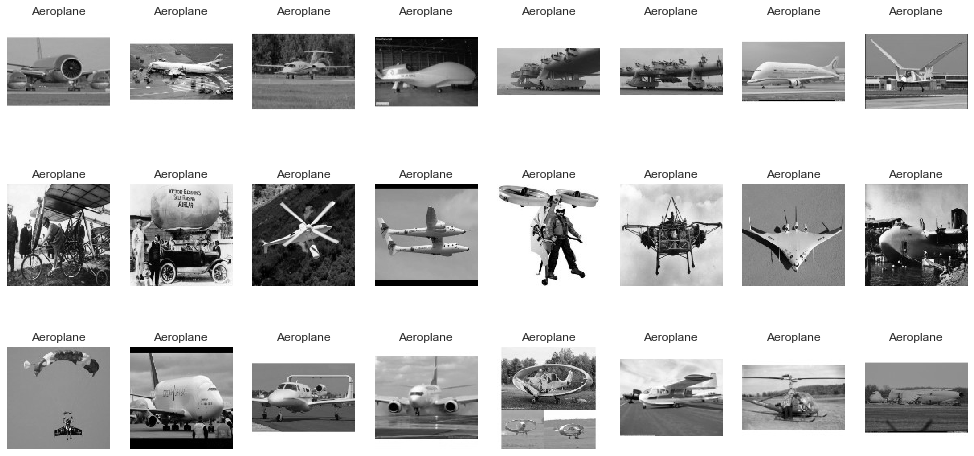

In [5]:
# we plot the image using function
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

category = list(df_category['category'])

def plot_gallery(images, titles, h, w, n_row=3, n_col=8):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
# now display the selected images        
plot_gallery(images_1d, category, 128, 128)

In [6]:
df = pd.DataFrame(data = images_1d)
df['Category'] = df_category.category.values
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Category
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Aeroplane
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Aeroplane
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Aeroplane
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Aeroplane
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Aeroplane


In [7]:
categories = ['Aeroplane', 'Boat', 'Car', 'Chair', 'Motorbike', 'SCENE1', 'SCENE2', 'Sofa']
df.Category.replace(to_replace = categories,
                 value = range(0,8), inplace = True)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,Category
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0


### 1.3 Metric Selection

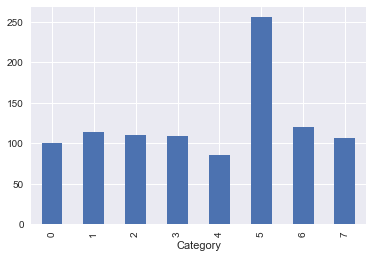

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

df.groupby(['Category']).Category.count().plot(kind = 'bar')

Since the number of different type of flaut are somehow imbalanced (which show in the histogram plot above), we should not use the normal accuracy as evaluation metric (the cost of misclassification for the small sized target class will be overlooked). F1 score considers both the precision and recall. As the higher precision, the lower false positive. As the higher the recall, the lower the false negative. Then, to minimize the both the false postive and false negative, we need a higher F1 score which is built to treat the precison and recall equally in the following equation.
$$F_1 = \frac{2rp}{r+p}$$
Thus, F1 score is a better choice for the dataset than the accuracy. 
Inside the F1 score measurement, there are two different ways (for nonbinary classification case) to deal among k classes - micro and macro options. As to Micro option, it sums up the true positive and flase positive individually to calculate the precison,
$$P_{micro} = \frac{\sum_{i=1}^{i=k}{TP_i}}{\sum_{i=1}^{i=k}{TP_i} + \sum_{i=1}^{i=k}{FP_i}}.$$
Similarly to compute the recall individually and combine the precison and recall computed to obtain the final F1 score.
As to Macro method, it takes the average of the F1 score of the system on different type of faults.
$$X_{macro} = \frac{\sum_{i=1}^{i=k}{X_i}}{k}$$
The macro option weights each $\bf{class}$ equally, is suitbale to used when people want to know how the system performs overall the whole datset. 
The micro option, which weights each $\bf{instance}$ equally, is good at the extremely inbalanced class sizes. Thus, for our dataset, we will choose the F1 score with macro option (do not especially care about one class than the other and would like to see the generalized performance).

As illustrated from the above figure, our image dataset doesn't suffer greatly by the class imbalance problems. In fact, except for category 5 (scene1), all other classes contain around 100 samples. Still, category 5 has almost twice the total number of samples than others. Therefore, the training set and test set has the risk of randomly choosing more samples from category 5, thus leading to the fake result of high accuracy if predicting more samples from dominant category. That's why accuracy is not an appropriate metric to evaluate our result. Precision-Recall is a useful measure of success of prediction when the classes are imbalanced.

On one hand, we do care about the false negatives of our dataset. For example, when enforcement camera fails to recognize all the images of a specific category, it could bring severe homeland security problems if that category relates to some disguised terrorists. On the other hand, the false positives could affect the overall performance when some images misclassified to a specific category. Consequently, the precison and recall measure are indispensible to our evaluation metrics. Besides, we assume classes are equally important so we choose the macro option in f1 score as our metric to evaluate our models in the project.

In conclusion, macro f1 measure that takes both precison and recall into account should be our evaluation metric.

In [10]:
from keras import backend as K
def f1_score(y_true, y_pred):
    
    # Count positive samples.
    y_true_clipped = K.cast(x=K.clip(y_true, 0, 1)>0.5,dtype='float32')
    y_pred_clipped = K.cast(x=K.clip(y_pred, 0, 1)>0.5,dtype='float32')
    a = K.sum(y_true_clipped*y_pred_clipped,axis=1)
    b = K.sum(y_true_clipped*(1-y_pred_clipped),axis=1)
    c = K.sum((1-y_true_clipped)*y_pred_clipped,axis=1)
    
    
    return K.mean(2*a/(2*a+b+c))

Using TensorFlow backend.


### 1.4 Data Splitting

Class imbalance does exist in our dataset, which is shown above, therefore we have to control the distribution of each class in both training set and testing set, thus attempting to achieve our performance. In that case, Stratified ShuffleSplit cross-validator is a great choice. This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, which returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class. As we treate each class equally, it is better to make the samples in the same proportion as the popultion. Shuffling splits would reduce the possibility of overfitting. In addition, we would like to see the generalized overall performance of our dataset rather than one-time radomized split. Meanwhile, we are also considering about the running time for the big image dataset. We choose the fold number to be 4 - a tradeoff between the efficiency and the generalization.

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Reshape
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn import metrics as mt
from sklearn.metrics import f1_score as f1

NUM_CLASSES = 8

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit

# we want to predict the X and y data as follows:
if 'Category' in df:
    y = df['Category'].values # get the labels we want
    del df['Category'] # get rid of the class label
    X = df.values # use everything else to predict!
    
# split our data into train and test sets using StratifiedShuffleSplit
cv_outerloop = StratifiedShuffleSplit(n_splits=4, test_size  = 0.3, random_state = 3)

for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)

print('The shape of X_train:',X_train.shape)
print('The shape of X_test:',X_test.shape)
print('The shape of X:',X.shape)

The shape of X_train: (700, 16384)
The shape of X_test: (301, 16384)
The shape of X: (1001, 16384)


<a id="Modeling"></a>
## 2. Modeling

### 2.1 Convolutional Network

In [69]:
def create_cnn(X_train, X_test, y_train_ohe):
   # simple CNN

    # make a CNN with conv layer and max pooling
    cnn = Sequential()
    cnn.add(Reshape((1,128,128), input_shape=(1,16384)))
    cnn.add(Conv2D(filters=16, kernel_size= (2, 2), padding='same', input_shape=(1,128,128)))
    cnn.add(Activation('relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    # add one layer on flattened output
    cnn.add(Flatten())
    cnn.add(Dense(NUM_CLASSES))
    cnn.add(Activation('softmax'))

    # Let's train the model 
    cnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=[f1_score])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras
    cnn.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)
    
    yhat_ohe = np.round(cnn.predict_proba(np.expand_dims(X_test, axis=1)))
    return np.argmax(yhat_ohe,axis=1), yhat_ohe

In [77]:
scores1 = []
y_test_model1 = []
yhat_model1 = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
    
    yhat, probas = create_cnn(X_train, X_test, y_train_ohe)
    scores1.append(f1(y_test, yhat, average = 'macro'))
    
    for val in zip(y_test, yhat):
        yhat_model1.append(val[1])
        y_test_model1.append(val[0])

192/301 [==================>...........] - ETA: 0s

95% CI for the mean F1_score for our model1 is 0.289243976288 +- 0.00901041343883


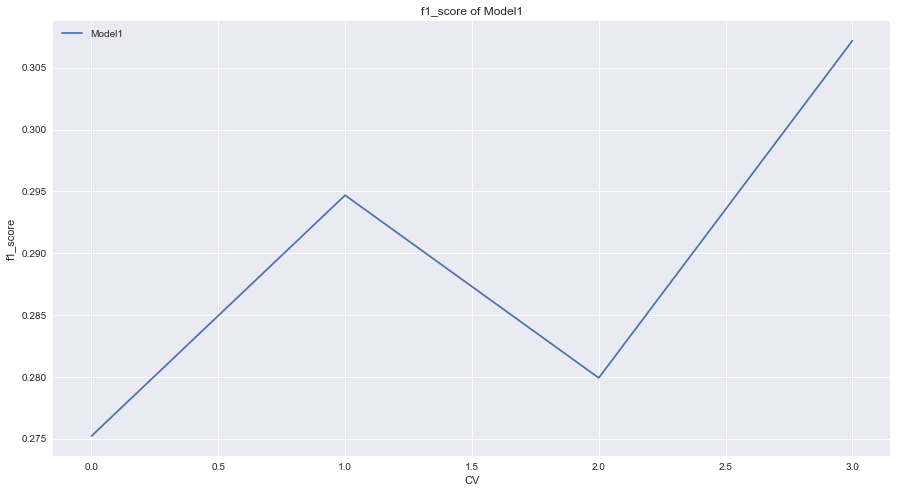

In [173]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

model1_score = np.array(scores1)
print('95% CI for the mean F1_score for our model1 is', model1_score.mean(), '+-', 2.26/10**0.5*model1_score.std())

plt.figure(figsize= (15,8))
plt.plot(model1_score, label='Model1')
plt.legend(loc='best')
plt.title('f1_score of Model1')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

The CI tells variance of f1_score is good for 4 folds - the model is generally stable up to now. The fluctuation in different cv is about 3%. The mean f1 score is around 0.29 and the highest one is around the 0.3. According to our dataset (some chaos go on the photos), the results are acceptable but we will try to use different CNN architectures and data expansion technique to improve towards our goal - 0.5. 

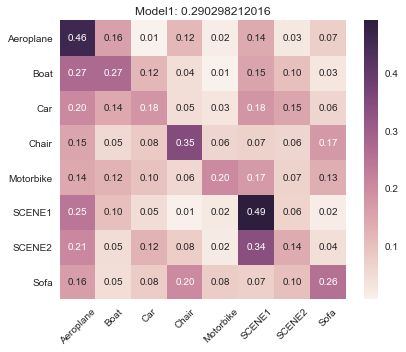

In [79]:
categories_y = ['Aeroplane', 'Boat', 'Car', 'Chair', 'Motorbike', 'SCENE1', 'SCENE2', 'Sofa']
categories_y.reverse()

plt.figure(figsize=(6,5))
f1_cnn = f1(y_test_model1, yhat_model1, average = 'macro')
cm = mt.confusion_matrix(y_test_model1, yhat_model1)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('Model1: '+str(f1_cnn))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)
plt.tight_layout()

plt.show()

In the average confusion matrix of the 4 folds, we can see that aeroplane and SCENE1 has a higher predicate rate than the rest of categories. It makes sense as aerpoplane has disntinct features - its aerofoils. The most possible missclassification is boat category. Some of boats have long shape which is possible to be considered as the aerofoils features of aeroplane. As to the SCENE1, it has twice instances in the SCENE1 and we choose macro f1 score metric, it is expected to be the best predicated class. Both SCENE1 and SCENE2 contains many mixed objects, the number of instances in SCENE2 is way less than that of SCENE1, which leads to a high misclassification rate that consider SCENE2 as SCENE1. After discussing the two high-predicted classes, we found that many classes other than Aeroplane are easy to be predicated to be an Aeroplane. One possible explanation is that planes have the wheels that is essential features for cars and motorbikes. Some photos describe the indoor setting of planes - which also could be conufused with chairs and sofas. Also, as the SCENE1 and SCENE2 contains mixed objects with the statement that areoplanes contains core features (wheel) of cars and motobike, has similar shape with long boats with quants, and also can be confused with sofas and chairs, it is reasonable that SCENES are misclassified as planes. In addition, most of the classes also have the tends to be misclassified as SCENE1. The possible reason is that the number of SCENE1 is way higher than the rest. Overall, the predicted result makes sense to us.

### 2.2 Comparison of Different Convolutional Network

In [80]:
def create_cnn2(X_train, X_test, y_train_ohe):
    # changes: 
    #    1. increased kernel size
    cnn2 = Sequential()
    cnn2.add(Reshape((1,128,128), input_shape=(1,16384)))
    cnn2.add(Conv2D(filters=16, kernel_size= (3, 3), padding='same', input_shape=(1,128,128)))
    cnn2.add(Activation('relu'))
    cnn2.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    # add one layer on flattened output
    cnn2.add(Flatten())
    cnn2.add(Dense(NUM_CLASSES))
    cnn2.add(Activation('softmax'))

    # Let's train the model 
    cnn2.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=[f1_score])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras
    cnn2.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)
    
    yhat_ohe = np.round(cnn2.predict_proba(np.expand_dims(X_test, axis=1)))
    return np.argmax(yhat_ohe,axis=1), yhat_ohe

In [81]:
scores2 = []
y_test_model2 = []
yhat_model2 = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
    
    yhat, probas = create_cnn2(X_train, X_test, y_train_ohe)
    scores2.append(f1(y_test,yhat, average = 'macro'))
    
    for val in zip(y_test, yhat):
        yhat_model2.append(val[1])
        y_test_model2.append(val[0])

288/301 [===========================>..] - ETA: 0s

In [96]:
def create_cnn3(X_train, X_test, y_train_ohe):
    # changes: 
    #    1. increased kernel size
    #    2. add another conv/pool layer with increasing num filters
    #    3. add more layers once flattened
    cnn3 = Sequential()
    cnn3.add(Reshape((1,128,128), input_shape=(1,16384)))

    num_filt_layers = [24, 48]
    for num_filters in num_filt_layers:
        cnn3.add(Conv2D(filters=num_filters, 
                    kernel_size=(4,4), 
                    padding='same'))
        cnn3.add(Activation('relu'))
        cnn3.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))
    

    # add one layer on flattened output
    cnn3.add(Dropout(0.25)) # add some dropout for regularization after conv layers
    cnn3.add(Flatten())
    cnn3.add(Dense(100))
    cnn3.add(Activation('relu'))
    cnn3.add(Dropout(0.5)) # add some dropout for regularization, again!
    cnn3.add(Dense(NUM_CLASSES))
    cnn3.add(Activation('softmax'))

    # Let's train the model 
    cnn3.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=[f1_score])

    # we need to exapnd the dimensions here to give the 
    #   "channels" dimension expected by Keras
    cnn3.fit(np.expand_dims(X_train, axis=1), y_train_ohe, 
        batch_size=32, epochs=120, 
        shuffle=True, verbose=0)
    
    yhat_ohe = np.round(cnn3.predict_proba(np.expand_dims(X_test, axis=1)))
    return np.argmax(yhat_ohe,axis=1), yhat_ohe

In [121]:
scores3 = []
y_test_model3 = []
yhat_model3 = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
    
    yhat, probas = create_cnn3(X_train, X_test, y_train_ohe)
    scores3.append(f1(y_test,yhat, average = 'macro'))
    
    for val in zip(y_test, yhat):
        yhat_model3.append(val[1])
        y_test_model3.append(val[0])

256/301 [========================>.....] - ETA: 0s

95% CI for the mean F1_score for our model2 is 0.299551116763 +- 0.0120259884015
95% CI for the mean F1_score for our model3 is 0.321670846567 +- 0.0130900790944


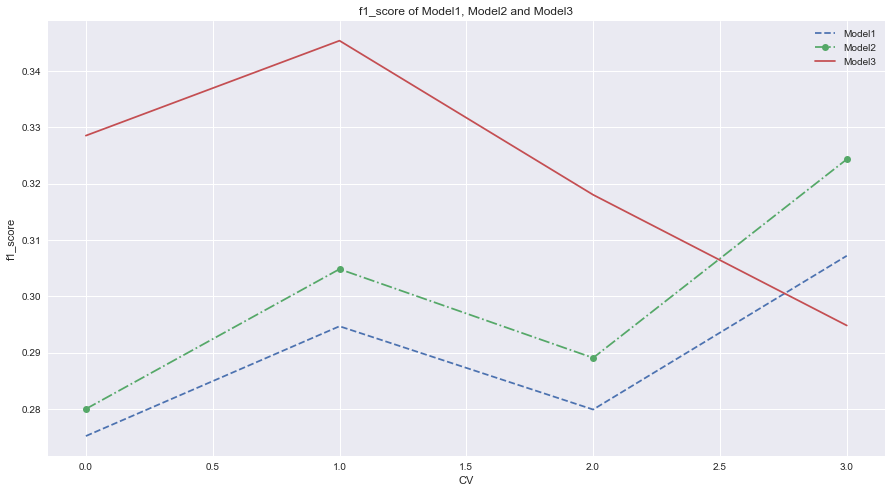

In [122]:
model2_score = np.array(scores2)
model3_score = np.array(scores3)
print('95% CI for the mean F1_score for our model2 is', model2_score.mean(), '+-', 2.26/10**0.5*model2_score.std())
print('95% CI for the mean F1_score for our model3 is', model3_score.mean(), '+-', 2.26/10**0.5*model3_score.std())

plt.figure(figsize= (15,8))
plt.plot(model1_score, label='Model1', linestyle = '--')
plt.plot(model2_score, label='Model2', linestyle='-.', marker='o')
plt.plot(model3_score, label='Model3')
plt.legend(loc='best')
plt.title('f1_score of Model1, Model2 and Model3')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

Here we compare the generalization performance of our the three CNN models. As you can see, all the three models are relative stable varying no more than 4% in different cv. From the plot only, it is hard to say whether model3 is better or wrose than model1 and model2. The only statement can be made here is that model2 is better than model1. We will do the statistical tests.

In [123]:
# to calculate the difference between two F-1 scores and get its CI
m1_m2_dif = model2_score - model1_score

print('95% confidence Interval for "f1_dif":',np.mean(m1_m2_dif)-2.26/10**0.5*np.std(m1_m2_dif),
                                              np.mean(m1_m2_dif)+2.26/10**0.5*np.std(m1_m2_dif))

95% confidence Interval for "f1_dif": 0.00714912736675 0.0134651535829


In [124]:
# to calculate the difference between two F-1 scores and get its CI
m1_m3_dif = model3_score - model1_score

print('95% confidence Interval for "f1_dif":',np.mean(m1_m3_dif)-2.26/10**0.5*np.std(m1_m3_dif),
                                              np.mean(m1_m3_dif)+2.26/10**0.5*np.std(m1_m3_dif))

95% confidence Interval for "f1_dif": 0.0134938854741 0.0513598550846


In [125]:
# to calculate the difference between two F-1 scores and get its CI
m2_m3_dif = model3_score - model2_score

print('95% confidence Interval for "f1_dif":',np.mean(m2_m3_dif)-2.26/10**0.5*np.std(m2_m3_dif),
                                              np.mean(m2_m3_dif)+2.26/10**0.5*np.std(m2_m3_dif))

95% confidence Interval for "f1_dif": 0.000252097127411 0.0439873624817


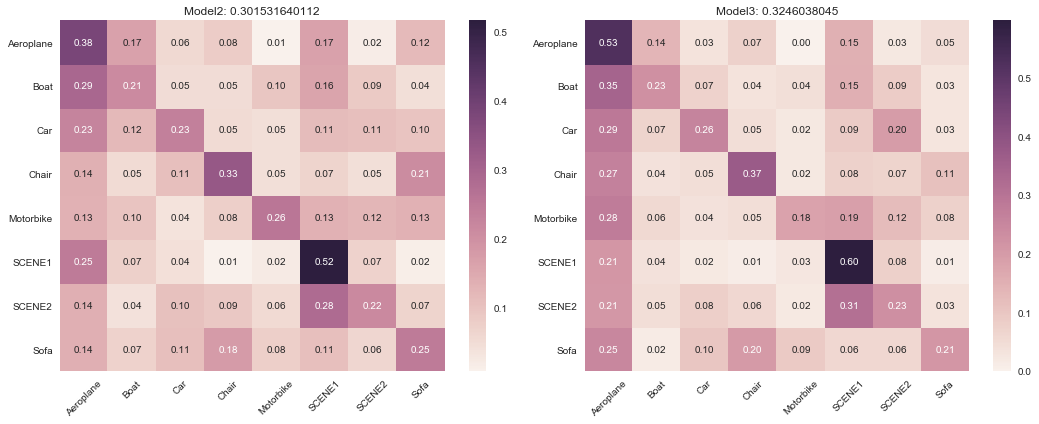

In [126]:
plt.figure(figsize=(15,6))

f1_cnn2 = f1(y_test_model2, yhat_model2, average = 'macro')
plt.subplot(1,2,1)
cm = mt.confusion_matrix(y_test_model2, yhat_model2)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('Model2: '+str(f1_cnn2))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)


f1_cnn3 = f1(y_test_model3, yhat_model3, average = 'macro')
plt.subplot(1,2,2)
cm = mt.confusion_matrix(y_test_model3, yhat_model3)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('Model3: '+str(f1_cnn3))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)
plt.tight_layout()
plt.show()

For this section, we investigate two other different CNN architectures. For the model2, we add the kernel size and we can see that the stablility is similar as model1 but the mean f1 score is improved silghtly - exceeded 0.3. The statistical test shows significant - telling that the only change the kernel size will lead the results different. Then, we build up our model3 by changing the number of layers, fliters, epchos and adding the dropout. The result of model3 enhanced as it made the mean f1 score up to 0.32 with the same digit place variance. In addition, the statistic inference tells that model3 surpasses the model2. Thus, model1 < model2 < model3. As for the confustion matrix, they shows the similar traits as the model1 but with high values in the diagonals. We use the model3 to compare the standard MLP and try the data expansion and RGB dataset in the end.

### 2.3 Comparison of Convolutional Network and MLP using ROC

In [103]:
def create_MLP(X_train, X_test, y_train_ohe):

    # make a 3 layer keras MLP
    mlp = Sequential()
    mlp.add( Dense(input_dim=X_train.shape[1], units=30, activation='relu') )
    mlp.add( Dense(units=15, activation='relu') )
    mlp.add( Dense(NUM_CLASSES) )
    mlp.add( Activation('softmax') )

    mlp.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=[f1_score])

    mlp.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=150, 
        shuffle=True, verbose=0)


    yhat_ohe = np.round(mlp.predict_proba(X_test))
    return np.argmax(yhat_ohe,axis=1), yhat_ohe

In [104]:
scores4 = []
y_test_model4 = []
yhat_model4 = []
for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
    
    yhat, probas = create_MLP(X_train, X_test, y_train_ohe)
    scores4.append(f1(y_test,yhat, average = 'macro'))
    
    for val in zip(y_test, yhat):
        yhat_model4.append(val[1])
        y_test_model4.append(val[0])

 32/301 [==>...........................] - ETA: 3s

/Users/wangsimin/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


 32/301 [==>...........................] - ETA: 3s

95% CI for the mean F1_score for our model1 is 0.0900195063443 +- 0.0506739017283


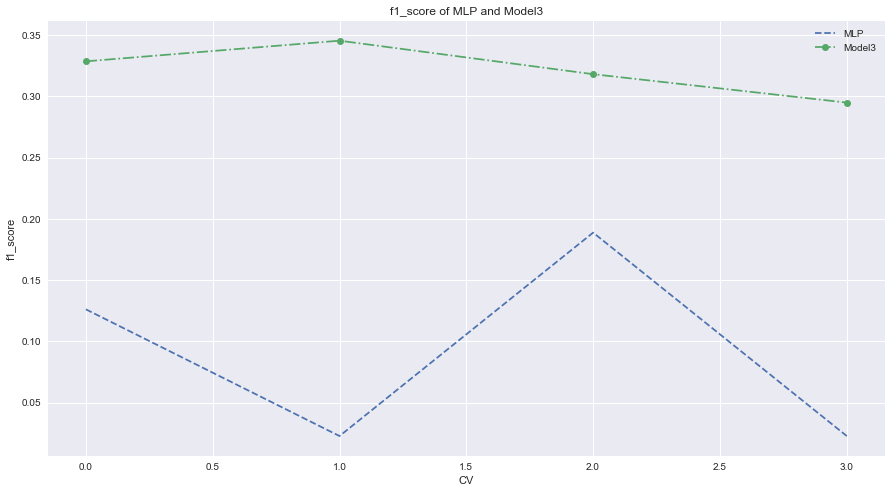

In [127]:
mlp_score = np.array(scores4)
print('95% CI for the mean F1_score for our model1 is', mlp_score.mean(), '+-', 2.26/10**0.5*mlp_score.std())

plt.figure(figsize= (15,8))
plt.plot(mlp_score, label='MLP', linestyle = '--')
plt.plot(model3_score, label='Model3', linestyle='-.', marker='o')
plt.legend(loc='best')
plt.title('f1_score of MLP and Model3')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

From the plot, we can say the results of CNN is always better than that of MLP. Besides, the MLP is more unstable than CNN in 4 cv folds. We will look into the confusion matrix to peek some possible reasons behind.

In [128]:
#to calculate the difference between two F-1 scores and get its CI
mlp_m3_dif = model3_score - mlp_score

print('95% confidence Interval for "f1_dif":',np.mean(mlp_m3_dif)-2.26/10**0.5*np.std(mlp_m3_dif),
                                              np.mean(mlp_m3_dif)+2.26/10**0.5*np.std(mlp_m3_dif))

95% confidence Interval for "f1_dif": 0.179555308534 0.283747371912


The statistical test shows that 0 is not in the interval and all the value within the interval is positive - we have 95% confidence that CNN model3 is better than the MLP model.

/Users/wangsimin/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


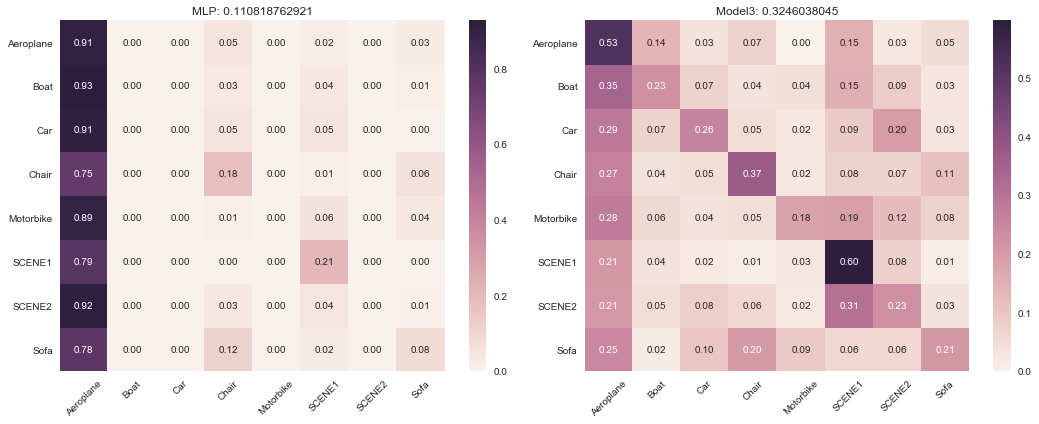

In [129]:
plt.figure(figsize=(15,6))

f1_mlp = f1(y_test_model4, yhat_model4, average = 'macro')
plt.subplot(1,2,1)
cm = mt.confusion_matrix(y_test_model4, yhat_model4)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('MLP: '+ str(f1_mlp))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)

f1_cnn3 = f1(y_test_model3, yhat_model3, average = 'macro')
plt.subplot(1,2,2)
cm = mt.confusion_matrix(y_test_model3, yhat_model3)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('Model3: '+ str(f1_cnn3))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)
plt.tight_layout()
plt.show()

The MLP model misclassify almost all the categories into the areoplane class. Although we explain the possible reasons above, that should be within a reasonable range. Thus, the result of MLP is bad. The slightly "better" classes are chair, sofa, and SCENE1. It is possible that the number of photos showing the indoor setting of a plane is not as much as the outside of a plane (more boat, car, and motobike are misclassified). As for the SCENE1, the possible reason is that the number of photos in SCENE1 in our dataset is bigger than the rests. Comparing with the CNN model3, the result is balanced and can be explained using our previous statements. Overall, the CNN model3 is better than MLP for our dataset.

In [108]:
import sklearn
from sklearn.metrics import roc_curve, auc
from scipy import interp

def plot_ROC(classifier):
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    all_tpr = []

    cv = 0
    for train_index, test_index in cv_outerloop.split(X, y):
        cv += 1
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
            
        y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
        y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
        
        probas = []
        if(classifier is 'mlp'):
            yhat, probas = create_MLP(X_train, X_test, y_train_ohe)
        else:
            yhat, probas = create_cnn3(X_train, X_test, y_train_ohe)
              
        perclass_mean_tpr = 0.0
        roc_auc = 0
        classes = np.unique(y_train)
        # get the mean fpr and tpr, per class
        for j in classes:
            fpr, tpr, thresholds = roc_curve(y_test,
                                         probas[:, j],
                                         pos_label=j)
            perclass_mean_tpr += interp(mean_fpr, fpr, tpr)
            perclass_mean_tpr[0] = 0.0
            roc_auc += auc(fpr, tpr)
        
        perclass_mean_tpr /= len(classes)
        roc_auc /= len(classes)
        mean_tpr += perclass_mean_tpr
        plt.plot(mean_fpr,perclass_mean_tpr,'--',lw=1,label='Mean Class ROC cv %d (area = %0.2f)'
                   % (cv, roc_auc))
    mean_tpr /= cv
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr,perclass_mean_tpr,'k-',lw=2,label='Total Mean ROC (area = %0.2f)'
                   % (mean_auc))
    plt.legend(loc='best')
    plt.grid()

 32/301 [==>...........................] - ETA: 4s

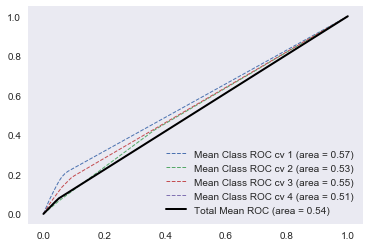

In [109]:
plt.style.use('seaborn-whitegrid')

plot_ROC('mlp')

301/301 [==============================] - 0s     


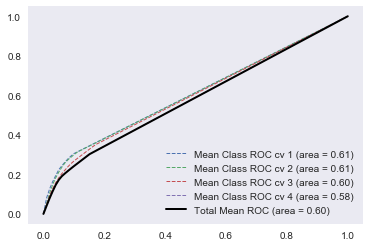

In [110]:
plot_ROC('cnn3')

From the plot, we can see that the CNN model3 has the curve comparatively closer to the upper-left corner overall. The CNN model3 has a better performance with mean AUC of 0.60 than that of MLP model, which is 0.54. This result is consistent with what we find from f1_score plot.

In MLP model, we notice that the False positive rate is relative higher at the same True positive rate, leading the overall curve deviates from the upper-left corner and has smaller AUC. That is because the default threshold the MLP model used to classfy positive and negative in model might be smaller than needed. Therefore, it will misclassify some more negative into positive predictions and reduce our f1_score.

<a id="ExceptionalWork"></a>
## 3. Exceptional Work

### 3.1 Data Expansion

Use data expansion to train our Model3 and try to improve generalization performance. What's more, we add l2 norm regularization to our model3 as well to pervent data explosion and overfitting.

In [13]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2 

#apply data expansion to model3
def cnn3_expansion(datagen, X_train, y_train_ohe, X_test, l2_lambda = 0.0001):
    datagen.fit(X_train)
    cnn3 = Sequential()

    num_filt_layers = [24, 48]
    for num_filters in num_filt_layers:
        cnn3.add(Conv2D(filters=num_filters,
                    input_shape = (128,128,1),
                    kernel_size=(4,4),
                    kernel_initializer='he_uniform', 
                    kernel_regularizer=l2(l2_lambda),
                    padding='same'))
        cnn3.add(Activation('relu'))
        cnn3.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
    

    # add one layer on flattened output
    cnn3.add(Dropout(0.25)) # add some dropout for regularization after conv layers
    cnn3.add(Flatten())
    cnn3.add(Dense(100, 
                   activation='relu',
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda)))
    cnn3.add(Dropout(0.5)) # add some dropout for regularization, again!
    cnn3.add(Dense(NUM_CLASSES, 
                  activation='softmax', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)))

    # Let's train the model 
    cnn3.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=[f1_score])

    # the flow method yields batches of images indefinitely, with the given transformations
    cnn3.fit_generator(datagen.flow(X_train, y_train_ohe, batch_size=100), 
                   steps_per_epoch=int(len(X_train)/100), # how many generators to go through per epoch
                   epochs=100, verbose=0,
                  )
    
    return np.argmax(cnn3.predict(X_test), axis=1)

Since our dataset has many abnormal pictures, data expansion and memorization certainly helps. And we use ImageDataGenerator to generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches) indefinitely. First, we want to explore whether image rotation and shift is useful for performance improvement. Therefore, we just initialize rotation_range = 5,  width_shift_range=0.1, height_shift_range=0.1. Later on, we would continue to find out which operations and specific ranges do well.

In [14]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5, # used, Int. Degree range for random rotations.
    width_shift_range=0.1, # used, Float (fraction of total width). Range for random horizontal shifts.
    height_shift_range=0.1, # used,  Float (fraction of total height). Range for random vertical shifts.
    shear_range=0., # Float. Shear Intensity (Shear angle in counter-clockwise direction as radians)
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None)

In [113]:
scores = []
y_test_model = []
yhat_model = []

for train_index, test_index in cv_outerloop.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_train = np.expand_dims(X_train.reshape((-1,128,128)), axis=3)
    X_test = np.expand_dims(X_test.reshape((-1,128,128)), axis=3)
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
    
    yhat = cnn3_expansion(datagen, X_train, y_train_ohe, X_test)
    scores.append(f1(y_test,yhat, average = 'macro'))
    
    for val in zip(y_test, yhat):
        yhat_model.append(val[1])
        y_test_model.append(val[0])

95% CI for the mean F1_score for our model3_data_expansion is 0.455738111872 +- 0.0227648226523


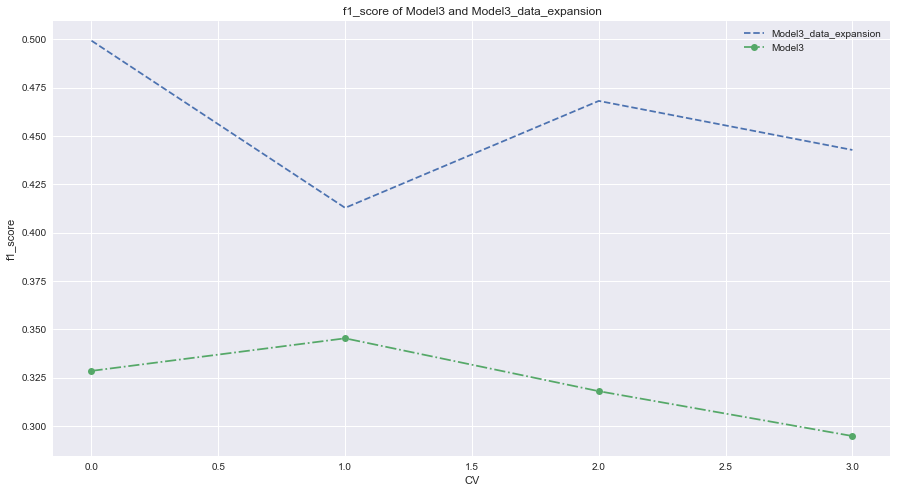

In [130]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

cnn_score = np.array(scores)
print('95% CI for the mean F1_score for our model3_data_expansion is', cnn_score.mean(), '+-', 2.26/10**0.5*cnn_score.std())

plt.figure(figsize= (15,8))
plt.plot(cnn_score, label='Model3_data_expansion', linestyle = '--')
plt.plot(model3_score, label='Model3', linestyle='-.', marker='o')
plt.legend(loc='best')
plt.title('f1_score of Model3 and Model3_data_expansion')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

In [137]:
#to calculate the difference between two F-1 scores and get its CI
m3DataExp_m3_dif = model3_score - cnn_score

print('95% confidence Interval for "f1_dif":',np.mean(m3DataExp_m3_dif)-2.26/10**0.5*np.std(m3DataExp_m3_dif),
                                              np.mean(m3DataExp_m3_dif)+2.26/10**0.5*np.std(m3DataExp_m3_dif))

95% confidence Interval for "f1_dif": -0.162276484904 -0.105858045705


Amazingly, seen from the above figure and significant testing result, data expansion greatly improves the mean f1_score by almost 0.13, which means that Model3 with data expansion is generally better than orginal Model3 since 0 is not included in the interval. Besides, we can observe that Model3 with data expansion tends to produce more stable results when more cross validations are performed, unfortunately we can't add more cvs due to the cost of running time. Anyway, we confirm that data expansion performs pretty well for our dataset.

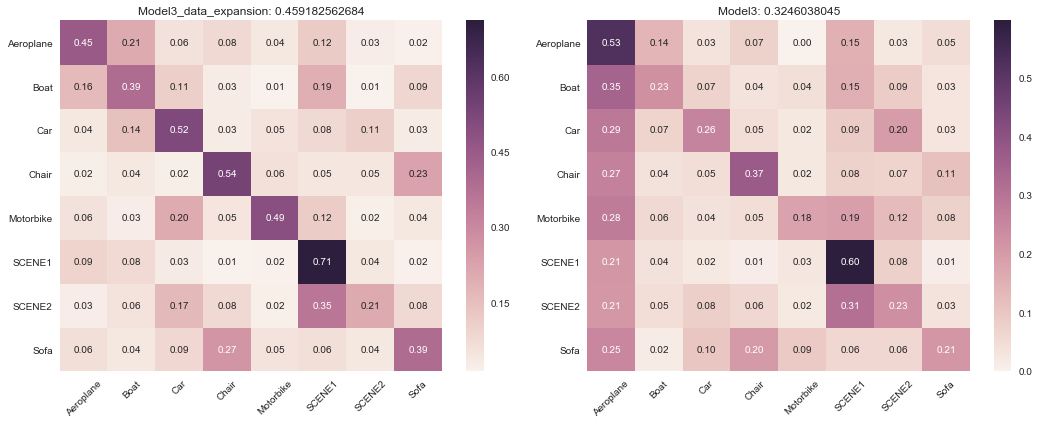

In [182]:
plt.figure(figsize=(15,6))

f1_cnn3_new = f1(y_test_model, yhat_model, average = 'macro')
plt.subplot(1,2,1)
cm = mt.confusion_matrix(y_test_model, yhat_model)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('Model3_data_expansion: '+str(f1_cnn3_new))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)

f1_cnn3 = f1(y_test_model3, yhat_model3, average = 'macro')
plt.subplot(1,2,2)
cm = mt.confusion_matrix(y_test_model3, yhat_model3)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('Model3: '+ str(f1_cnn3))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)
plt.tight_layout()
plt.show()

Now, let's see how exactly data expansion improves the general performance. According to the confusion matrix, it's not hard to discover that almost all the accuracies from diagonal values for Model3 with data expansion increase compared to the original Model3. Specially, the category 'Car' and 'Motorbike' improves the most by increasing 0.25 - 0.3. Now, they're not likely to be misclassified to 'Aeroplane' or 'SCENE1' anymore. So does the 'Boat', 'Chair' and 'Sofa', and they are predicted much better as well. Still, 'SCENE2' isn't seen any significant improvement, which could be concluded that 'SCENE2' is quite rediculous that there isn't any pattern the model could learn to predict well. And our images from SCENE2 indeed contain so many categories of things, which is hard for human to determine either.

### 3.2 RGB Model

One possible way to improve the performance of our CNN model is to use RGB images instead of greyscale images. The reason why we use greyscale images is because we can reduce computation load in this way. However, we could also miss some information. For example, cars are more likely to be related to road while planes are more likely to be related to sky and cloud. Both road and sky could have unique color features. Therefore, using RGB images data for CNN model may be helpful to identify these features and make more explicit prediction.

In [174]:
import pandas as pd
import numpy as np
import re
import os
from scipy import ndimage, misc

#reload data
df_category = pd.read_csv("../1001 Abnormal Image Dataset/category.csv")
df_category.groupby(['category']).size().reset_index(name='counts')
df_category.category.replace(to_replace = ['Aeroplane', 'Boat', 'Car', 'Chair', 'Motorbike', 'SCENE1', 'SCENE2', 'Sofa'],
                 value = range(0,8), inplace = True)

id_list = list(df_category['id'])

images = []
for i in id_list:
    i = str(i)
    image_path = "../1001 Abnormal Image Dataset/ResizedPhotos/"+ i + ".jpg"
    images.append(misc.imread(image_path))

yR = df_category['category'].values
XR = np.array(images)

In [175]:
from sklearn.model_selection import StratifiedShuffleSplit

# split our data into train and test sets using StratifiedShuffleSplit
cv_outerloop = StratifiedShuffleSplit(n_splits=3, test_size  = 0.2, random_state = 3)
NUM_CLASSES = 8

In [178]:
from keras.regularizers import l2 

#apply RGB data to Model3 with regularization
def RGB_cnn(X_train, X_test, y_train_ohe, l2_lambda = 0.0001):
   # simple CNN

    # make a CNN with conv layer and max pooling
    cnn = Sequential()
    num_filt_layers = [24, 48]
    for num_filters in num_filt_layers:
        cnn.add(Conv2D(filters=num_filters, 
                       kernel_size= (4, 4),
                       kernel_initializer='he_uniform', 
                       kernel_regularizer=l2(l2_lambda),
                       padding='same', 
                       input_shape=(128,128,3),
                       activation='relu'))
        cnn.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_last"))
        
    # add one layer on flattened output
    cnn.add(Dropout(0.25)) # add some dropout for regularization after conv layers
    cnn.add(Flatten())
    cnn.add(Dense(100, 
                   activation='relu',
                   kernel_initializer='he_uniform', 
                   kernel_regularizer=l2(l2_lambda)))
    cnn.add(Dropout(0.5)) # add some dropout for regularization, again!
    cnn.add(Dense(NUM_CLASSES, 
                  activation='softmax', 
                  kernel_initializer='glorot_uniform',
                  kernel_regularizer=l2(l2_lambda)))

    # Let's train the model 
    cnn.compile(loss='mean_squared_error',
              optimizer='rmsprop',
              metrics=[f1_score])
  
    # Exapnd the dimensions here to give the "channels" dimension expected by Keras
    cnn.fit(X_train, y_train_ohe, 
        batch_size=32, epochs=100, 
        shuffle=True, verbose=0)
                
    yhat_ohe = np.round(cnn.predict_proba(X_test))

    return np.argmax(yhat_ohe,axis=1)

In [179]:
scores5 = []
y_test_model5 = []
yhat_model5 = []
for train_index, test_index in cv_outerloop.split(XR, yR):
    X_train, X_test = XR[train_index], XR[test_index]
    y_train, y_test = yR[train_index], yR[test_index]
    
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    
    y_train_ohe = keras.utils.to_categorical(y_train, NUM_CLASSES)
    y_test_ohe = keras.utils.to_categorical(y_test, NUM_CLASSES)
    
    yhat = RGB_cnn(X_train, X_test, y_train_ohe)
    scores5.append(f1(y_test,yhat, average = 'macro'))
    
    for val in zip(y_test, yhat):
        yhat_model5.append(val[1])
        y_test_model5.append(val[0])

201/201 [==============================] - 2s     


95% CI for the mean F1_score for our RGBModel is 0.33220363934 +- 0.00491025279727


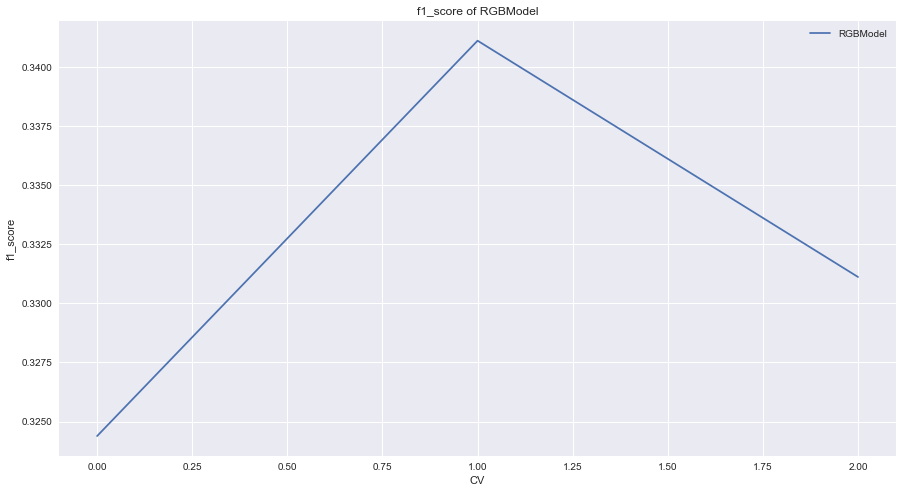

In [180]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

model5_score = np.array(scores5)
print('95% CI for the mean F1_score for our RGBModel is', model5_score.mean(), '+-', 2.26/10**0.5*model5_score.std())

plt.figure(figsize= (15,8))
plt.plot(model5_score, label='RGBModel')
plt.legend(loc='best')
plt.title('f1_score of RGBModel')
plt.xlabel('CV')
plt.ylabel('f1_score')
plt.show()

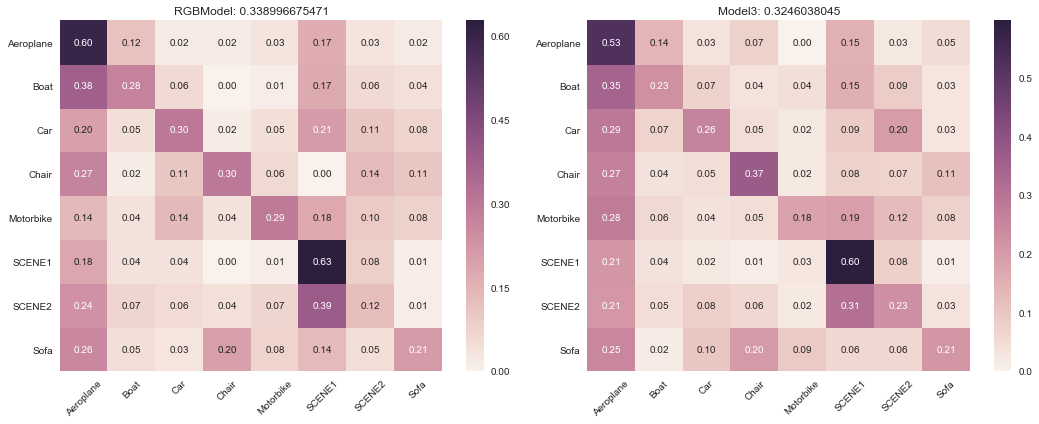

In [183]:
plt.figure(figsize=(15,6))

f1_cnnRGB = f1(y_test_model5, yhat_model5, average = 'macro')
plt.subplot(1,2,1)
cm = mt.confusion_matrix(y_test_model5, yhat_model5)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('RGBModel: '+str(f1_cnnRGB))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)

f1_cnn3 = f1(y_test_model3, yhat_model3, average = 'macro')
plt.subplot(1,2,2)
cm = mt.confusion_matrix(y_test_model3, yhat_model3)
cm = cm/np.sum(cm,axis=1)[:,np.newaxis]
sns.heatmap(cm,annot=True, fmt='.2f')
plt.title('Model3: '+ str(f1_cnn3))
tick_marks = np.arange(0.5, 8)
plt.xticks(tick_marks, categories, rotation = 45)
plt.yticks(tick_marks, categories_y, rotation = 0)
plt.tight_layout()
plt.show()

From the heat maps above we can find that the general result of RGB model only slightly outperform that from model 3. The prediction precision for each category is quite similiar to those in CNN3 model. The only significant improve category is Motorbike. In model3 28% motorbikes are misclassfied as Aeroplane while RGB model successfully classify less Motorbike into Aeropalane and has higer precision. 

Generally, RGB images does not help much in improving convolutional neural network performance in our case, which is not as we expect. 

A possible reason is that in our data set, many images are abnormal. In other words, the color and the environment of our objects might be quite different from what they tend to have in real world. Color is no longer an efficient feature for classification.

<a id="References"></a>
## References

[1] D. Marr. Vision. W. H. Freeman and Company. ISBN 0-7167-1284-9

[2] F. Li. Stanford Vision Lab. URL: http://vision.stanford.edu/

[3] The PASCAL Visual Object Classes Homepag. URL: http://host.robots.ox.ac.uk/pascal/VOC/

[4] B. Saleh, A. Elgammal, J. Feldman, and A. Farhadi. Toward a Taxonomy and Computational Models of Abnormalities in Images. AAAI. 2015. URL: https://arxiv.org/pdf/1512.01325.pdf

[5] B. Saleh, A. Elgammal, and J. Feldman. The Role of Typicality in Object Classification: Improving The Generalization Capacity of Convolutional Neural Networks. IJCAI. 2016. URL: https://arxiv.org/pdf/1602.02865.pdf

[6] B. Saleh, A. Farhadi, J. Feldman, and A. Elgammal. Abnormality Detection in Images. URL: http://paul.rutgers.edu/~babaks/abnormality_detection.html

[7] H. Feichtinger, T. Strohmer. Gabor Analysis and Algorithms. Birkhäuser. 1998. ISBN 0-8176-3959-4

[8] M. Pietikäinen. Local Binary Patterns. Scholarpedia. 2010. URL: http://www.scholarpedia.org/article/Local_Binary_Patterns

[9] N. Dalal. Software Toolkit for HOG Object Detection. URL: http://navneetdalal.com/software/